* MSV_HoVaTen:
521H0501_Phan Minh Hoàng,
521H0398_Lê Nguyễn Viết Hiệp,
521H0276_Trang Sĩ Nam



In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
data = pd.read_csv('bike_buyers.csv')
print(data.shape)

(1000, 13)


In [149]:
data = data.dropna()

In [150]:
# Check duplicate
data.duplicated().value_counts()

False    952
Name: count, dtype: int64

In [151]:
data = data.drop_duplicates()
data.shape

(952, 13)

# Transformation

In [152]:
# Tranform data
from sklearn.preprocessing import LabelEncoder

types = data.dtypes
names = list(data.columns)

le = LabelEncoder()
for i in range(len(types)):
    if types.iloc[i]=='object':
        le.fit_transform(data[names[i]])
        data[names[i]] = le.transform(data[names[i]])

# Normalization


In [153]:
from sklearn.preprocessing import MinMaxScaler
features = data.drop(['Purchased Bike'], axis=1)

scaler = MinMaxScaler()
model=scaler.fit(features)
scaled_data= pd.DataFrame(model.transform(features))

In [154]:
# split data
X = scaled_data
y = data['Purchased Bike']

# Feature Selection

In [155]:
from sklearn.feature_selection import SelectKBest, chi2
select_feature =  SelectKBest(score_func=chi2, k = 8)
f_best = select_feature.fit(X, y)               
X_new = f_best.transform(X)
X_new.shape

(952, 8)

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X_new, y, random_state = 42, test_size=0.2)

# K Nearest Neighbor

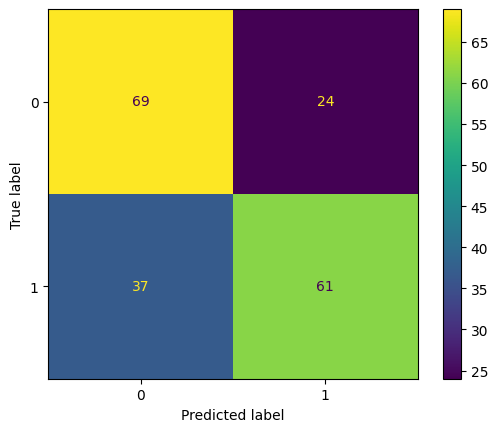

In [157]:
# Train model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, p=2, metric='euclidean')
KNN.fit(X_train, Y_train)

# test model
Y_pred = KNN.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [158]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        93
           1       0.72      0.62      0.67        98

    accuracy                           0.68       191
   macro avg       0.68      0.68      0.68       191
weighted avg       0.69      0.68      0.68       191



# Decision Tree

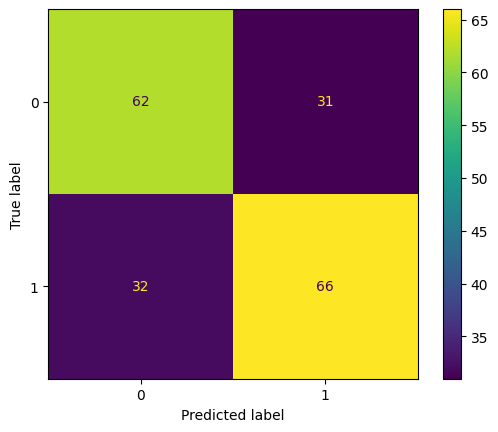

In [159]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(max_depth=7)
dTree.fit(X_train, Y_train)

Y_pred = dTree.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [160]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66        93
           1       0.68      0.67      0.68        98

    accuracy                           0.67       191
   macro avg       0.67      0.67      0.67       191
weighted avg       0.67      0.67      0.67       191



# Gaussian Naive Bayes

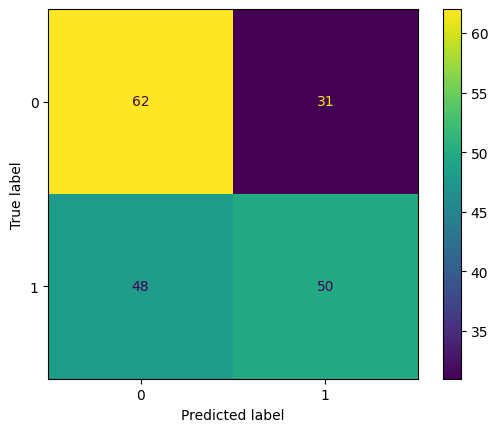

In [161]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

# test model
Y_pred = gnb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [162]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61        93
           1       0.62      0.51      0.56        98

    accuracy                           0.59       191
   macro avg       0.59      0.59      0.58       191
weighted avg       0.59      0.59      0.58       191



# Multinomial Naive Bayes

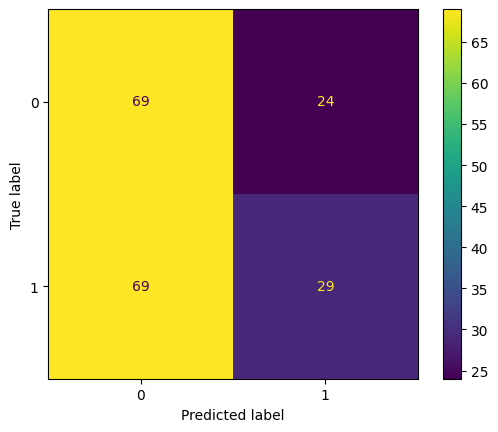

In [163]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

# test model
Y_pred = mnb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [164]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.50      0.74      0.60        93
           1       0.55      0.30      0.38        98

    accuracy                           0.51       191
   macro avg       0.52      0.52      0.49       191
weighted avg       0.52      0.51      0.49       191



# Bernoulli Naive Bayes

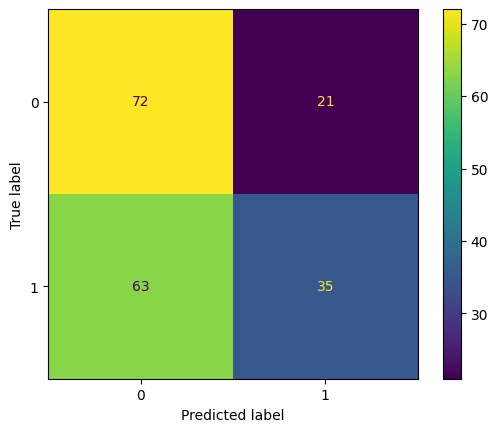

In [165]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
# test model
Y_pred = bnb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [166]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.53      0.77      0.63        93
           1       0.62      0.36      0.45        98

    accuracy                           0.56       191
   macro avg       0.58      0.57      0.54       191
weighted avg       0.58      0.56      0.54       191



# Logistic Regession

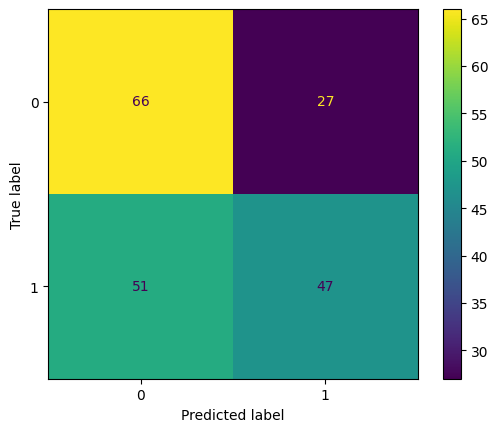

In [167]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [168]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.56      0.71      0.63        93
           1       0.64      0.48      0.55        98

    accuracy                           0.59       191
   macro avg       0.60      0.59      0.59       191
weighted avg       0.60      0.59      0.59       191



# Support Vector Machine

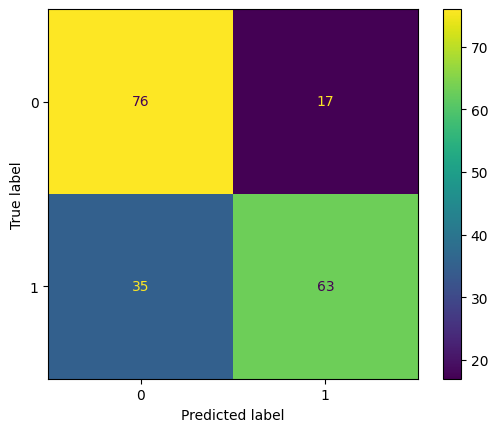

In [177]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels = ["linear", "poly","rbf", "sigmoid",]

svm = SVC(kernel="sigmoid", C=2.5)
svm.fit(X_train, Y_train)
# Evaluate the model on the test set
y_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [178]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.75        93
           1       0.79      0.64      0.71        98

    accuracy                           0.73       191
   macro avg       0.74      0.73      0.73       191
weighted avg       0.74      0.73      0.73       191



# Ensamble

* Bagging

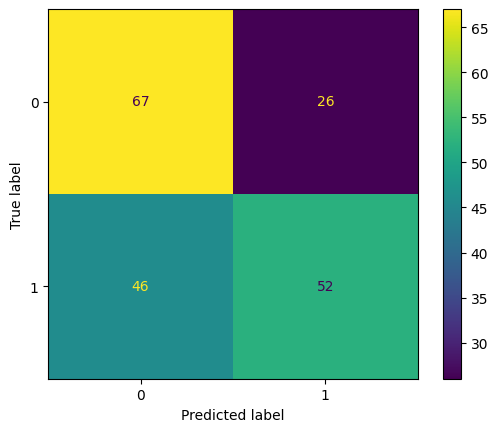

In [171]:
from sklearn.ensemble import BaggingClassifier


clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                        n_estimators=10, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [172]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65        93
           1       0.67      0.53      0.59        98

    accuracy                           0.62       191
   macro avg       0.63      0.63      0.62       191
weighted avg       0.63      0.62      0.62       191



* GradientBoosting

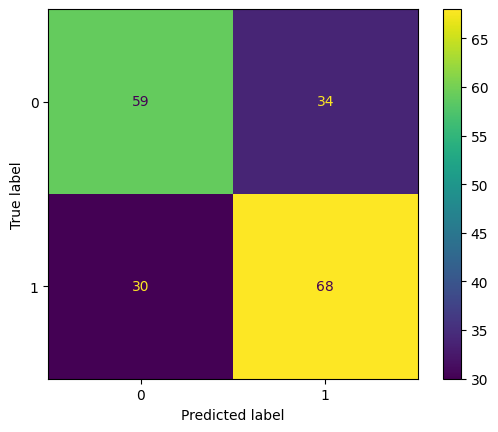

In [173]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [174]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.63      0.65        93
           1       0.67      0.69      0.68        98

    accuracy                           0.66       191
   macro avg       0.66      0.66      0.66       191
weighted avg       0.66      0.66      0.66       191



* Stack

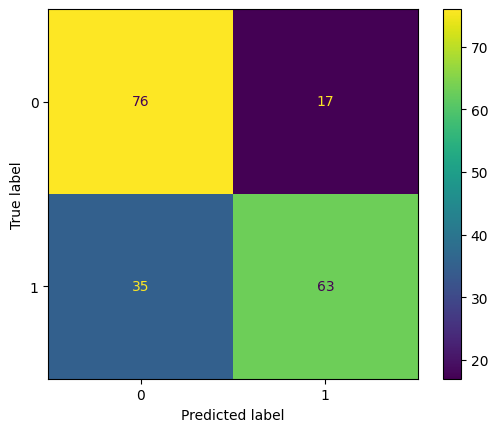

In [175]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

layer = list()

layer.append(('dt', DecisionTreeClassifier()))
layer.append(('bnb', BernoulliNB()))
layer.append(('svc', SVC()))

finalLayer = LogisticRegression()

model = StackingClassifier(estimators=layer, final_estimator=finalLayer, cv=5)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
Y_pred_train = model.predict(X_train)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [176]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.75        93
           1       0.79      0.64      0.71        98

    accuracy                           0.73       191
   macro avg       0.74      0.73      0.73       191
weighted avg       0.74      0.73      0.73       191

